In [5]:
# Import all necessary libraries.
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import graphviz

In [8]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

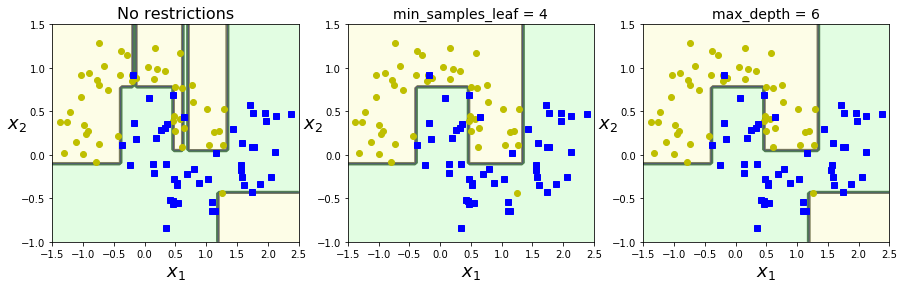

In [16]:
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf3 = DecisionTreeClassifier(max_depth=6, random_state=42)

deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)
deep_tree_clf3.fit(Xm, ym)

plt.figure(figsize=(15, 4))
plt.subplot(131)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(132)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.subplot(133)
plot_decision_boundary(deep_tree_clf3, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("max_depth = {}".format(deep_tree_clf3.max_depth), fontsize=14)

plt.show()

## Observação

As árvores de decisão fazem muito poucas suposições sobre os dados de treinamento (em oposição aos modelos lineares, que obviamente assumem que os dados são lineares, por exemplo). Se deixada sem restrições, a estrutura da árvore se adaptará aos dados de treinamento, ajustando-se a eles muito bem e, provavelmente, sobreajustando.

Para evitar o sobreajuste aos dados de treinamento, você precisa restringir a liberdade da Árvore de Decisão durante o treinamento. Como você já sabe, isso é chamado de regularização. Os hiperparâmetros de regularização dependem do algoritmo usado, mas geralmente você pode pelo menos restringir a profundidade máxima da Árvore de Decisão. Na biblioteca Scikit-Learn, isso é controlado pelo hiperparâmetro max_depth (o valor padrão é 'None', o que significa ilimitado). Reduzir max_depth regularizará o modelo e, assim, reduzirá o risco de sobreajuste.

A classe DecisionTreeClassifier possui alguns outros parâmetros que restringem de forma semelhante a forma da Árvore de Decisão: min_samples_split (o número mínimo de amostras que um nó deve ter antes de poder ser dividido), min_samples_leaf (o número mínimo de amostras que uma folha deve ter), min_weight_fraction_leaf (o mesmo que min_samples_leaf, mas expresso como uma fração do número total de instâncias ponderadas), max_leaf_nodes (número máximo de folhas) e max_features (número máximo de atributos que são avaliados para divisão em cada nó). Aumentar min_ * hiperparâmetros ou reduzir max_ * hiperparâmetros regularizará o modelo.

A Figura acima mostra Árvores de Decisão treinadas no conjunto de dados da lua. À esquerda, a Árvore de Decisão é treinada com os hiperparâmetros padrão (ou seja, sem restrições) e à direita a Árvore de Decisão é treinada com min_samples_leaf = 4 e max_depth = 6, respectivamente. É bastante óbvio que o modelo à esquerda está sobreajustado, e os modelos à direita provavelmente generalizarão melhor.